ERROR ==  [[0.74381844]]
ERROR ==  [[0.69195604]]
ERROR ==  [[0.74411634]]
ERROR ==  [[0.68818261]]
ERROR ==  [[0.73977487]]
ERROR ==  [[0.68435036]]
ERROR ==  [[0.73526176]]
ERROR ==  [[0.6805597]]
ERROR ==  [[0.73076496]]
ERROR ==  [[0.67680878]]
ERROR ==  [[0.72629037]]
ERROR ==  [[0.67309402]]
ERROR ==  [[0.72183895]]
ERROR ==  [[0.66941243]]
ERROR ==  [[0.71741119]]
ERROR ==  [[0.66576159]]
ERROR ==  [[0.71300734]]
ERROR ==  [[0.66213952]]
ERROR ==  [[0.70862747]]
ERROR ==  [[0.65854459]]
ERROR ==  [[0.70427155]]
ERROR ==  [[0.65497546]]
ERROR ==  [[0.69993943]]
ERROR ==  [[0.65143101]]
ERROR ==  [[0.69563092]]
ERROR ==  [[0.64791031]]
ERROR ==  [[0.69134578]]
ERROR ==  [[0.64441259]]
ERROR ==  [[0.68708374]]
ERROR ==  [[0.64093717]]
ERROR ==  [[0.68284455]]
ERROR ==  [[0.63748349]]
ERROR ==  [[0.67862792]]
ERROR ==  [[0.63405105]]
ERROR ==  [[0.6744336]]
ERROR ==  [[0.63063942]]
ERROR ==  [[0.67026134]]
ERROR ==  [[0.62724822]]
ERROR ==  [[0.66611089]]
ERROR ==  [[0.6238771]]
ERR

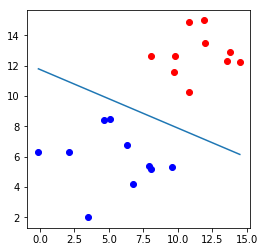

In [31]:
import numpy as np
import matplotlib.pyplot as plt

def draw(x1, x2):
    ln = plt.plot(x1, x2)
    
def sigmoid(score):
    return (1.0/(1.0 + np.exp(-score)))

def calculate_error(points, line_parameters, yval):
    #probabilites = sigmoid(points * line_parameters)
    linear_combination = points * line_parameters
    probabilites = sigmoid(linear_combination)
    m = points.shape[0]
    cross_entropy = -(1/m)*(np.log(probabilites).T*yval + np.log(1-probabilites).T*(1-yval))
    #-(1/m) * (np.log(probabilites).T * yval) + (np.log(1-probabilites).T * (1 - yval))
    #print( "PROBABILITIES == ", probabilites)
    #print( "CROSS ENTROPY == ", cross_entropy)
    return cross_entropy

def gradient_descent(points, line_parameters, yval, alpha):
    n = points.shape[0]
    for i in range(1000):
        linear_combination = points * line_parameters
        p = sigmoid(linear_combination)
        gradient = points.T * (p - yval) * (alpha / n)
        line_parameters = line_parameters - gradient
        w1= line_parameters.item(0)
        w2= line_parameters.item(1)
        b= line_parameters.item(2)
        x1 = np.array([points[:,0].min(), points[:,0].max()])
        x2 = -b / w2 + (x1 * (-w1/ w2))
        print("ERROR == " , calculate_error(points, line_parameters, yval))
    draw(x1, x2)

no_of_pts = 10
bias = np.ones(no_of_pts)
np.random.seed(0)
x1 = np.random.normal(10, 2, no_of_pts)
y1 = np.random.normal(12, 2, no_of_pts)
x2 = np.random.normal(5, 2, no_of_pts)
y2 = np.random.normal(6, 2, no_of_pts)
top_region = np.array([x1, y1, bias]).T
bottom_region = np.array([x2, y2, bias]).T
all_points = np.vstack((top_region, bottom_region))
line_parameters = np.matrix([0, 0, 0]).T
y = np.array([np.zeros(no_of_pts), np.ones(no_of_pts)]).reshape(no_of_pts *2, 1)
    
_, ax = plt.subplots(figsize=(4,4))
ax.scatter(top_region[:,0], top_region[:,1], color ="r")
ax.scatter(bottom_region[:, 0], bottom_region[:,1], color = 'b')
gradient_descent( all_points, line_parameters, y, alpha=0.06)

plt.show()    